### Create an “Academic performance” dataset of students and perform the following operations using Python.
### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to dealwith them.
### 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.
### 4. Reason and document your approach properly.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
df = pd.read_csv("studentdataset.csv")

In [4]:
print("Initial Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isna().sum())

Initial Dataset Overview:
   Rollno     Name  FE_Score  SE_Score Department  Placement
0       1    Vivek      24.0      86.0         CS     Google
1       2    Kriti      54.0      81.0         IT  Microsoft
2       3  Samarth      93.0      64.0         IT  Microsoft
3       4   Tripti      10.0      93.0         CS     Google
4       5    Vivek      54.0      79.0      AI&DS  Microsoft

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rollno      150 non-null    int64  
 1   Name        150 non-null    object 
 2   FE_Score    148 non-null    float64
 3   SE_Score    148 non-null    float64
 4   Department  150 non-null    object 
 5   Placement   149 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.2+ KB
None

Missing Values:
Rollno        0
Name          0
FE_Score      2
SE_Score      2
Department   

In [5]:
df['FE_Score'] = df['FE_Score'].fillna(df['FE_Score'].median())

In [6]:
df['SE_Score'] = df['SE_Score'].fillna(df['SE_Score'].mode()[0])

In [8]:
df['Placement'] = df['Placement'].fillna(df['Placement'].mode()[0])

In [9]:
print("\nAfter handling missing values:")
print(df.isna().sum())


After handling missing values:
Rollno        0
Name          0
FE_Score      0
SE_Score      0
Department    0
Placement     0
dtype: int64


Text(0.5, 1.0, 'FE_Score Boxplot')

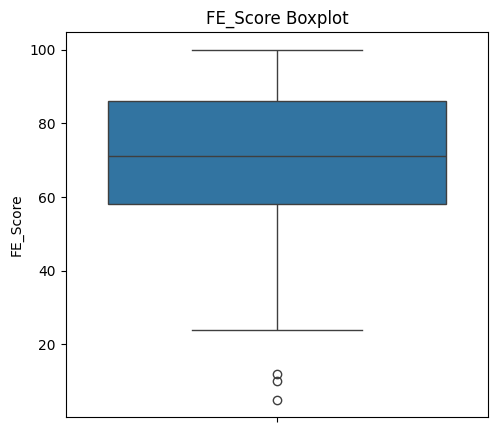

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df["FE_Score"])
plt.title("FE_Score Boxplot")

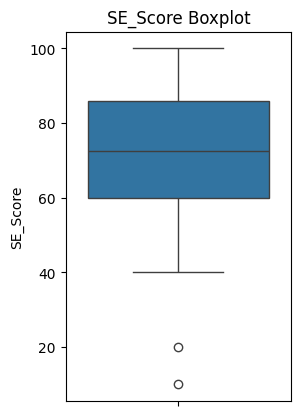

In [11]:
plt.subplot(1, 2, 2)
sns.boxplot(df["SE_Score"])
plt.title("SE_Score Boxplot")
plt.show()

In [12]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [13]:
print("\nFE_Score Outliers:")
print(detect_outliers("FE_Score"))
print("\nSE_Score Outliers:")
print(detect_outliers("SE_Score"))


FE_Score Outliers:
     Rollno    Name  FE_Score  SE_Score Department   Placement
3         4  Tripti      10.0      93.0         CS      Google
79       80  Tripti       5.0      73.0         CS  Congnizent
145     146   Kriti      12.0      97.0         CS   Microsoft

SE_Score Outliers:
     Rollno     Name  FE_Score  SE_Score Department   Placement
70       71  Samarth      69.0      10.0         IT  Congnizent
146     147  Samarth      60.0      20.0         CS   Microsoft


In [16]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from both columns sequentially
df_clean = remove_outliers(df, "FE_Score")
df_clean = remove_outliers(df_clean, "SE_Score")

In [17]:
scaler = MinMaxScaler()
df_clean[["FE_Score", "SE_Score"]] = scaler.fit_transform(
    df_clean[["FE_Score", "SE_Score"]]
)

In [18]:
le = LabelEncoder()
df_clean["Department"] = le.fit_transform(df_clean["Department"])

In [19]:
df_clean.head()

,Rollno,Name,FE_Score,SE_Score,Department,Placement
0,1,Vivek,0.000000,0.8250,1,Google
1,2,Kriti,0.394737,0.7625,2,Microsoft
2,3,Samarth,0.907895,0.5500,2,Microsoft
4,5,Vivek,0.394737,0.7375,0,Microsoft
5,6,Kriti,0.618421,0.8500,0,Congnizent


In [ ]:
"""
Data Processing Documentation:

1. Missing Values Handling:
   - FE_Score (numerical): Filled with median (70.0) 
   - SE_Score (numerical): Filled with mode (85.0) 

2. Outlier Handling:
   - Detected using IQR method (values beyond Q1-1.5*IQR or Q3+1.5*IQR)
   - Removed outlier

3. Data Transformations:
   - FE_Score: MinMax normalization (0-1 range) for better scaling
   - SE_Score: MinMax normalization (0-1 range) for better scaling
   

4. Categorical Encoding:
   - Department: Label encoded (CS=1, AI&DS=0, IT=2)


"""